In [1]:
import numpy as np
import pandas as pd
import sys
import warnings
from functions import *
warnings.filterwarnings("ignore")

# I will work with only numpy in main.py for both simplicity's sake, and because of pandas
# handling memory strangely

# for reproducibility
np.random.seed(123)

# print full arrays/dataframes for debugging
# np.set_printoptions(threshold=sys.maxsize)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# names of columns extracted.
# note we are not using filenames right now, will need to look at that
# for unique identifier because of inode reuse
feat_cols = ["inode", "pid", "ppid", "uid", "euid", "gid", "egid"]

# import all .dat files from ./ima/ into numpy array
data = None
datanp, filepaths = import_ima(data)

./ima/20200115.dat
importing next...
All IMA measurements in ./ima/ imported successfully.


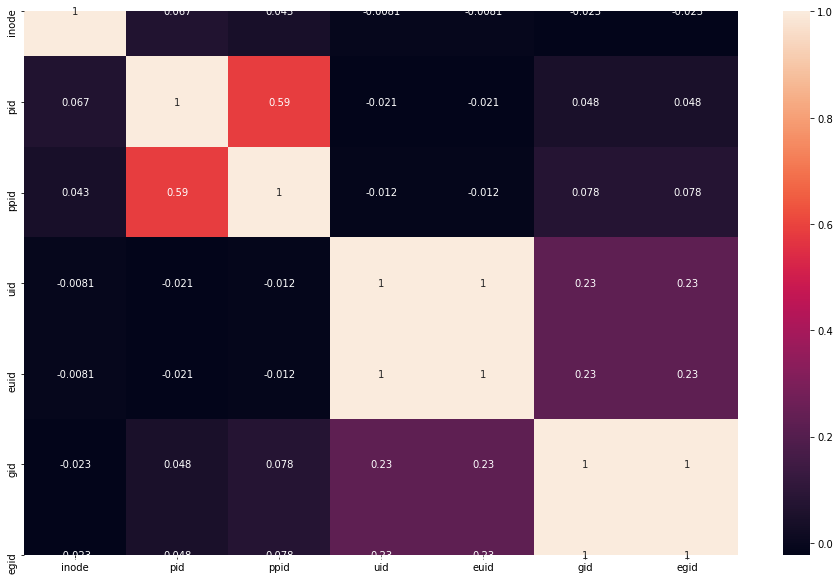

datanp.shape (13471, 5)


In [2]:
# reduce dimensions with high correlation filter
# drawmap=1 to see heatmap for justification
datanp, red_cols = high_corr_filter(datanp=datanp, feat_cols=feat_cols,
                                    drawmap=1)
print("datanp.shape", datanp.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13471 samples in 0.024s...
[t-SNE] Computed neighbors for 13471 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13471
[t-SNE] Computed conditional probabilities for sample 2000 / 13471
[t-SNE] Computed conditional probabilities for sample 3000 / 13471
[t-SNE] Computed conditional probabilities for sample 4000 / 13471
[t-SNE] Computed conditional probabilities for sample 5000 / 13471
[t-SNE] Computed conditional probabilities for sample 6000 / 13471
[t-SNE] Computed conditional probabilities for sample 7000 / 13471
[t-SNE] Computed conditional probabilities for sample 8000 / 13471
[t-SNE] Computed conditional probabilities for sample 9000 / 13471
[t-SNE] Computed conditional probabilities for sample 10000 / 13471
[t-SNE] Computed conditional probabilities for sample 11000 / 13471
[t-SNE] Computed conditional probabilities for sample 12000 / 13471
[t-SNE] Computed conditional probabilities for sa

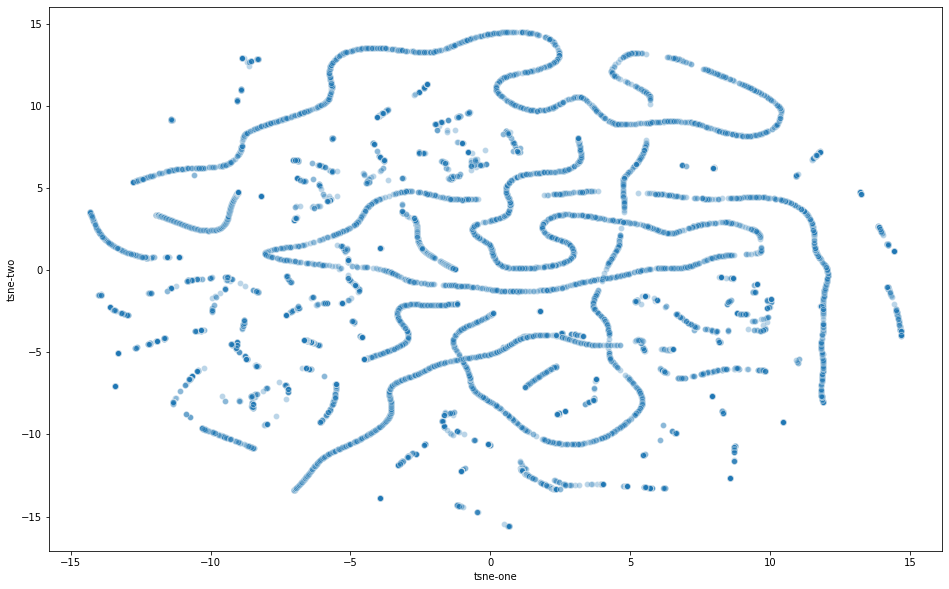

In [3]:
# reduce dimensions using tSNE (to 2 dimensions), return numpy
datatsne = func_tsne(datanp=datanp, feat_cols=red_cols,
                     drawplot=1, n_components=2)

In [4]:
# perform 2D DBSCAN (TSNE). Output 3rd column is cluster labels
dataclust_tsne = func_dbscan(data=datatsne[:, [5, 6]],
                        eps=0.4,
                        min_samples=7,
                        drawplot=1)

Estimated number of clusters: 122
Estimated number of noise points: 72


In [5]:
explore_cluster(datanp=datanp,
                dataclust=dataclust_tsne,
                cols=red_cols,
                filepaths=filepaths)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13471 samples in 0.026s...
[t-SNE] Computed neighbors for 13471 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13471
[t-SNE] Computed conditional probabilities for sample 2000 / 13471
[t-SNE] Computed conditional probabilities for sample 3000 / 13471
[t-SNE] Computed conditional probabilities for sample 4000 / 13471
[t-SNE] Computed conditional probabilities for sample 5000 / 13471
[t-SNE] Computed conditional probabilities for sample 6000 / 13471
[t-SNE] Computed conditional probabilities for sample 7000 / 13471
[t-SNE] Computed conditional probabilities for sample 8000 / 13471
[t-SNE] Computed conditional probabilities for sample 9000 / 13471
[t-SNE] Computed conditional probabilities for sample 10000 / 13471
[t-SNE] Computed conditional probabilities for sample 11000 / 13471
[t-SNE] Computed conditional probabilities for sample 12000 / 13471
[t-SNE] Computed conditional probabilities for sa

<Figure size 1152x720 with 0 Axes>

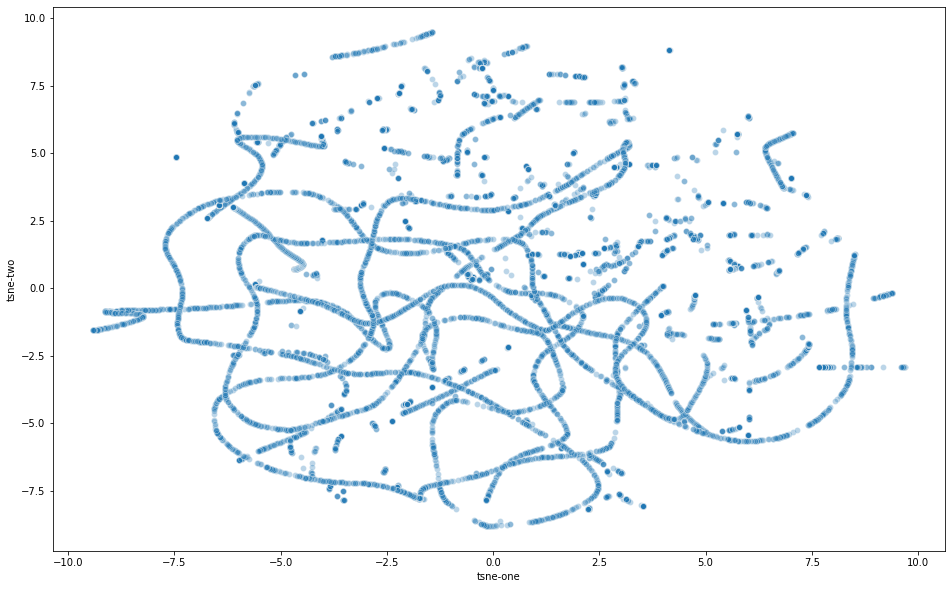

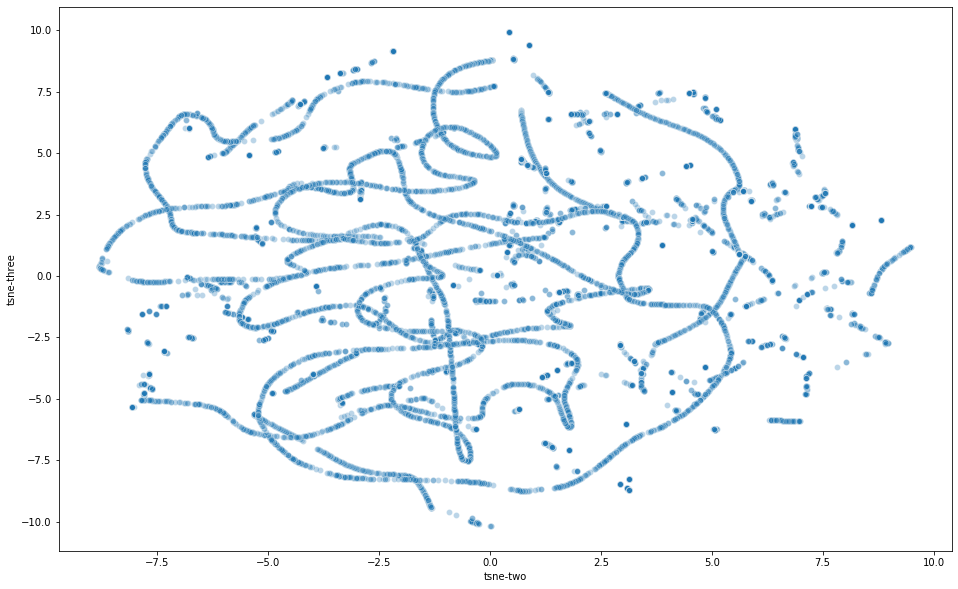

showing  tsne  plot...


In [6]:
# reduce dimensions using tSNE (to 3 dimensions), return numpy
datatsne_threedee = func_tsne(datanp=datanp, feat_cols=red_cols,
                     drawplot=1, n_components=3)

Estimated number of clusters: 172
Estimated number of noise points: 132


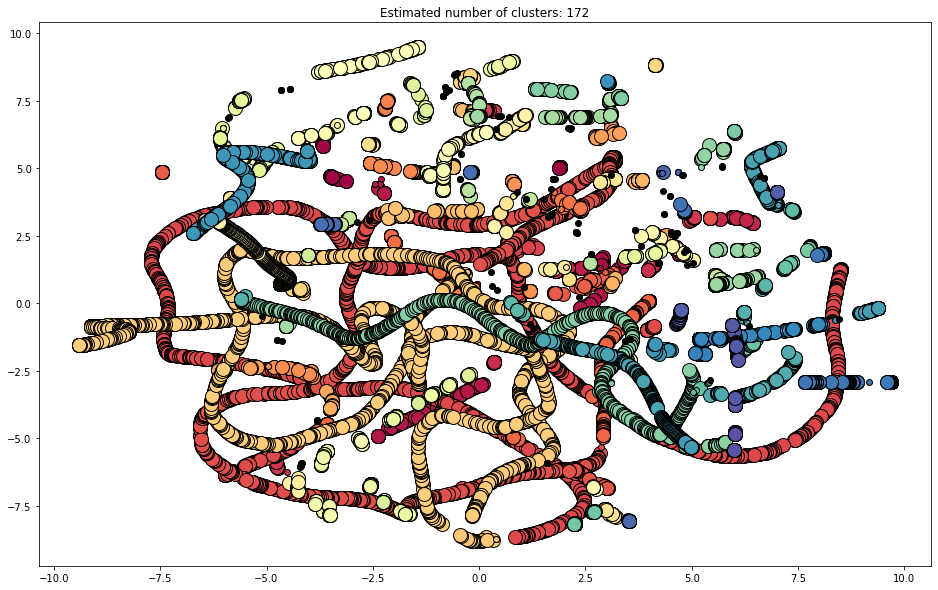

ValueError: Shape of passed values is (13471, 3), indices imply (13471, 2)

In [7]:
# perform 3D DBSCAN (TSNE). Output 3rd column is cluster labels
dataclust_tsne_threedee = func_dbscan(data=datatsne_threedee[:, [5, 6, 7]],
                        eps=0.4,
                        min_samples=7,
                        drawplot=1)

In [ ]:
explore_cluster(datanp=datanp,
                dataclust=dataclust_tsne_threedee,
                cols=red_cols,
                filepaths=filepaths)